In [1]:
# install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd



In [2]:
pwd

'C:\\Users\\sikde\\Desktop\\Python_Visualization'

In [3]:
cd /Users/sikde/Desktop/Projects/Trump_tweets/

C:\Users\sikde\Desktop\Projects\Trump_tweets


In [396]:
# Load data
df = pd.read_csv("trumptweets.csv")

In [397]:
df.head()

,id,link,content,contentmod,date,retweets,favorites,mentions,hashtags,geo
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,Be sure to tune in and watch Donald Trump on L...,5/4/2009 20:54,500,868,NaN,NaN,NaN
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,Donald Trump will be appearing on The View tom...,5/5/2009 3:00,33,273,NaN,NaN,NaN
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,Donald Trump reads Top Ten Financial Tips on L...,5/8/2009 15:38,12,18,NaN,NaN,NaN
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,New Blog Post: Celebrity Apprentice Finale and...,5/8/2009 22:40,11,24,NaN,NaN,NaN
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...","""My persona will never be that of a wallflower...",5/12/2009 16:07,1399,1965,NaN,NaN,NaN


In [398]:
list(df.columns)

['id',
 'link',
 'content',
 'contentmod',
 'date',
 'retweets',
 'favorites',
 'mentions',
 'hashtags',
 'geo']

In [399]:
df.drop(['id','link','content'], axis = 1, inplace = True)

In [400]:
# Create a column for year
import datetime
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,contentmod,date,retweets,favorites,mentions,hashtags,geo,year
0,Be sure to tune in and watch Donald Trump on L...,5/4/2009 20:54,500,868,NaN,NaN,NaN,2009
1,Donald Trump will be appearing on The View tom...,5/5/2009 3:00,33,273,NaN,NaN,NaN,2009
2,Donald Trump reads Top Ten Financial Tips on L...,5/8/2009 15:38,12,18,NaN,NaN,NaN,2009
3,New Blog Post: Celebrity Apprentice Finale and...,5/8/2009 22:40,11,24,NaN,NaN,NaN,2009
4,"""My persona will never be that of a wallflower...",5/12/2009 16:07,1399,1965,NaN,NaN,NaN,2009


In [401]:
df.drop(['date'], axis = 1, inplace = True)

In [402]:
# Select only 2016 tweets 
df2016 = df[df.year == 2016]
df2016.head()

,contentmod,retweets,favorites,mentions,hashtags,geo,year
27172,"Do you believe that The State Department, on N...",2379,5904,NaN,NaN,NaN,2016
27173,I would like to wish everyone A HAPPY AND HEAL...,5969,14936,NaN,NaN,NaN,2016
27174,"I will be on @ FoxNews live, with members of m...",1776,5742,@,NaN,NaN,2016
27175,HAPPY NEW YEAR & THANK YOU!,2887,7363,NaN,NaN,NaN,2016
27176,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2882,7839,NaN,#,NaN,2016


In [403]:
df2016.tail()

,contentmod,retweets,favorites,mentions,hashtags,geo,year
31118,Great move on delay (by V. Putin) - I always k...,29104,83039,NaN,NaN,NaN,2016
31119,"Join @ AmerIcan32, founded by Hall of Fame leg...",6201,21635,@ @,NaN,NaN,2016
31120,Russians are playing @ CNN and @ NBCNews for s...,19319,72360,@ @ @,NaN,NaN,2016
31121,"Happy New Year to all, including to my many en...",121041,314786,NaN,NaN,NaN,2016
31122,Happy Birthday @ DonaldJTrumpJr!,8082,48667,@,NaN,NaN,2016


In [404]:
df2016[["contentmod"]]

,contentmod
27172,"Do you believe that The State Department, on N..."
27173,I would like to wish everyone A HAPPY AND HEAL...
27174,"I will be on @ FoxNews live, with members of m..."
27175,HAPPY NEW YEAR & THANK YOU!
27176,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe
...,...
31118,Great move on delay (by V. Putin) - I always k...
31119,"Join @ AmerIcan32, founded by Hall of Fame leg..."
31120,Russians are playing @ CNN and @ NBCNews for s...
31121,"Happy New Year to all, including to my many en..."


In [405]:
import matplotlib.pyplot as plt
%matplotlib inline

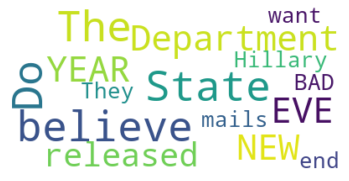

In [406]:
# Word cloud for the first tweet in 2016
tweet1 =df.contentmod[27172]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [407]:
# Merge all the tweets in one line
tweets = " ".join(tweet for tweet in df2016.contentmod)

In [409]:
# Delete these words from the word cloud
stopwords = set(STOPWORDS)

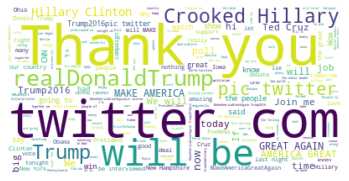

In [424]:
# instantiate a word cloud object
trump_wc = WordCloud(
    background_color='white',
    stopwords=stopwords
)

# generate the word cloud
trump_wc.generate(tweets)

plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [425]:
stopwords.update(["mod","content", "of", "the", "ha","tl","gd","bit"])

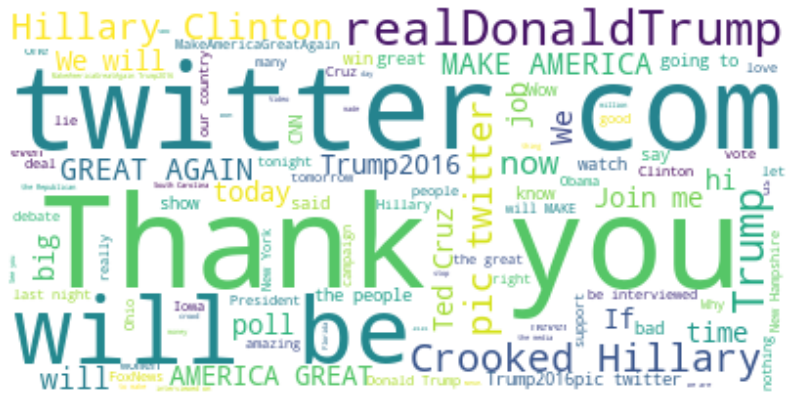

In [426]:
trump_wc = WordCloud(stopwords=stopwords, background_color="white").generate(tweets)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [427]:
# converting images into arrays
from PIL import Image

trump_mask = np.array(Image.open("trumppic.png"))


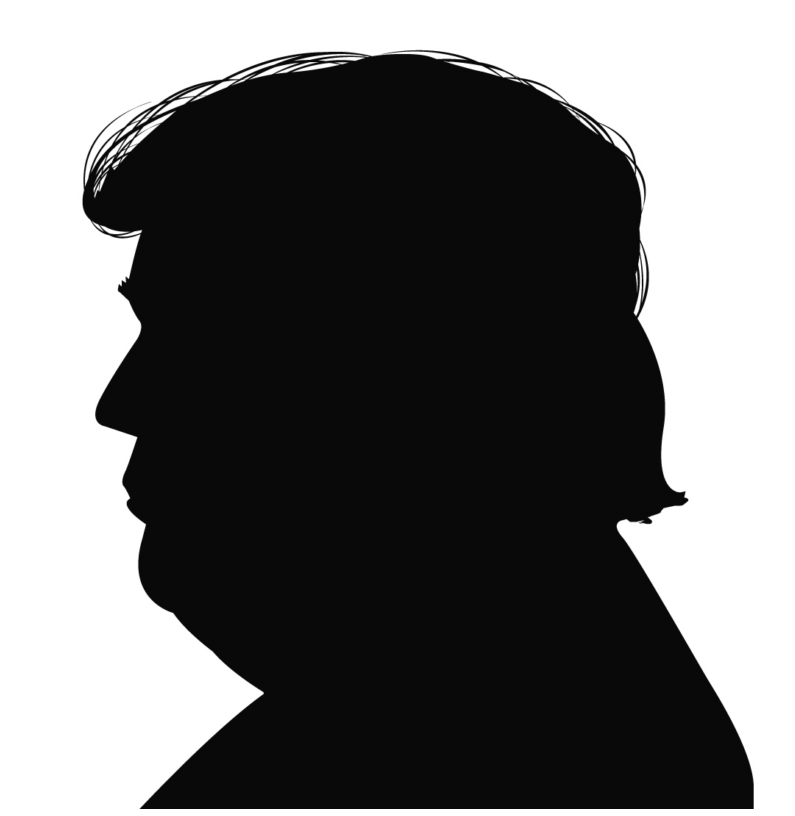

In [428]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

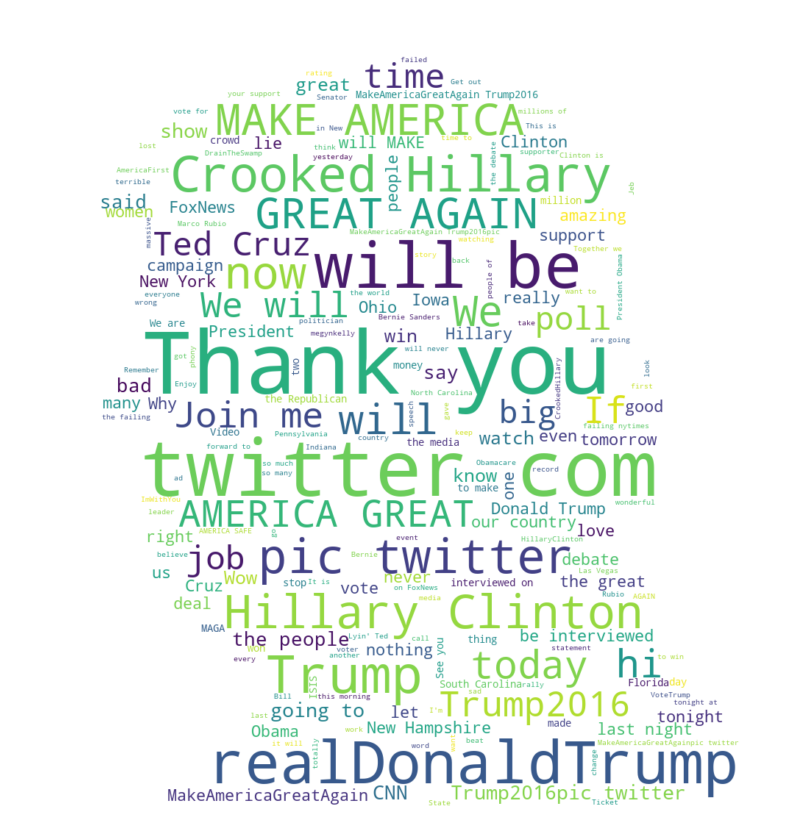

In [429]:
# instantiate a word cloud object
trump_wc = WordCloud(background_color='white', mask=trump_mask, stopwords=stopwords)

# generate the word cloud
trump_wc.generate(tweets)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### conclusion

Social media will play a pivotal role in the upcoming election. The American people loved his simple and repititive tweets. resident Trump's tweets were a big aspect of his political campaign. As you can see from the word cloud, his most popular tweets had "Thank you" followed by his catchy slogan. Futhermore, his tweets mentioned his two main threats: Ted Cruz for the republican nominee and Hilary Clinton for the presidency. You can also see the name of several states was mentioned . The word "we" was very popular amongst his tweets.
